# COVID 19 in Spain: Second wave?

Given the increase in cases since the first weeks of August, we want to know if we are currently in the second wave of this disease in Spain.

### Import packages

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
from datetime import datetime

### Read the datasets

In [2]:
#Read Datasets (Datasets to DataFrames)

df_CamasUCI2017 = pd.read_csv('../input/covid19-in-spain/ccaa_camas_uci_2017.csv')
df_Covid19AltasCCAA = pd.read_csv('../input/covid19-in-spain/ccaa_covid19_altas_long.csv')
df_Covid19CasosCCAA = pd.read_csv('../input/covid19-in-spain/ccaa_covid19_casos_long.csv')
df_Covid19FallecidosCCAA = pd.read_csv('../input/covid19-in-spain/ccaa_covid19_fallecidos_long.csv')
df_Covid19HospitalizadosCCAA = pd.read_csv('../input/covid19-in-spain/ccaa_covid19_fallecidos_long.csv')
df_Covid19MascarillasCCAA = pd.read_csv('../input/covid19-in-spain/ccaa_covid19_mascarillas.csv')
df_Covid19UCICCAA = pd.read_csv('../input/covid19-in-spain/ccaa_covid19_uci_long.csv')
df_Covid19ESP = pd.read_csv('../input/covid19-in-spain/nacional_covid19.csv')
df_Covid19REdadESP = pd.read_csv('../input/covid19-in-spain/nacional_covid19_rango_edad.csv')

### Review the data

In [3]:
#Camas UCI 2017: Beds in the ICU by Autonomous Community. Public hospitals, private hospitals and total.
#df_CamasUCI2017.head()
#df_CamasUCI2017.describe()

#Covid19 Altas CCAA:  Medical discharge by Autonomous Community and date
#df_Covid19AltasCCAA.head()
#df_Covid19AltasCCAA.describe()

#Covid19 Casos CCAA:  Amount of cases by Autonomous Community and date
#df_Covid19CasosCCAA.tail()
#df_Covid19CasosCCAA.describe()

#Covid19 Fallecidos CCAA:  Amount of deaths by Autonomous Community and date
#df_Covid19FallecidosCCAA.head()
#df_Covid19FallecidosCCAA.describe()

#Covid19 Hospitalizados CCAA:  Hospitalized patients by Autonomous Community and date
#df_Covid19HospitalizadosCCAA.head()
#df_Covid19HospitalizadosCCAA.describe()

#Covid19 Mascarillas CCAA:  Amount os mask from 10/03/2020 by Autonomous Community and date
#df_Covid19MascarillasCCAA.head()
#df_Covid19MascarillasCCAA.describe()

#Covid19 UCI CCAA: Patients in the ICU by Autonomous Community and date
#df_Covid19UCICCAA.head()
#df_Covid19UCICCAA.describe()

#Covid19 Spain: Medical discharges, deaths, ICU and hospital admissions
#df_Covid19ESP.head()
#df_Covid19ESP.describe()

#Covid19 Spain by Age: Medical discharges, deaths, ICU and hospital admissions by age 
#df_Covid19REdadESP.head()
#df_Covid19REdadESP.describe()

In [4]:
print('Dataset Covid19 Spain last updated: ' + df_Covid19ESP.iloc[:]['fecha'].max())

Dataset Covid19 Spain last updated: 2020-10-26


All the datasets except Covid19 Spain. For this reason. I am going to use only this dataset to extract insights.

Population by region ([Source INE 2020](https://www.ine.es/jaxiT3/Tabla.htm?t=2853&L=0))

In [5]:

data_Population = [
                 ['Andalucía', 8414240],
                 ['Aragón', 1319291],
                 ['Principado de Asturias', 1022800],
                 ['Islas Baleares', 1149460],
                 ['Islas Canarias', 2153389],
                 ['Cantabria', 581078],
                 ['Castilla-La Mancha', 2032863],
                 ['Castilla y León', 2399548],
                 ['Cataluña', 7675217],
                 ['Ceuta y Melilla', 171264],
                 ['Comunidad Valenciana', 5003769],
                 ['Extremadura', 1067710],
                 ['Galicia', 2699499],
                 ['Comunidad de Madrid', 6663394],
                 ['Región de Murcia', 1493898],
                 ['Comunidad Foral de Navarra', 654214],
                 ['País Vasco', 2207776],
                 ['La Rioja', 316798]    
] 


population = pd.DataFrame(data_Population, columns = ['CCAA', 'Population'])

## Transform the information
Let see the datatypes of each colunm

In [6]:
df_Covid19REdadESP.dtypes

fecha                object
rango_edad           object
sexo                 object
casos_confirmados     int64
hospitalizados        int64
ingresos_uci          int64
fallecidos            int64
dtype: object

It is necessary to change the datatype of `'fecha'` (date) to a datetime

In [7]:
df_Covid19REdadESP['fecha']= pd.to_datetime(df_Covid19REdadESP['fecha'])
df_Covid19REdadESP.dtypes

fecha                datetime64[ns]
rango_edad                   object
sexo                         object
casos_confirmados             int64
hospitalizados                int64
ingresos_uci                  int64
fallecidos                    int64
dtype: object

Understanding the data distribution using seaborn

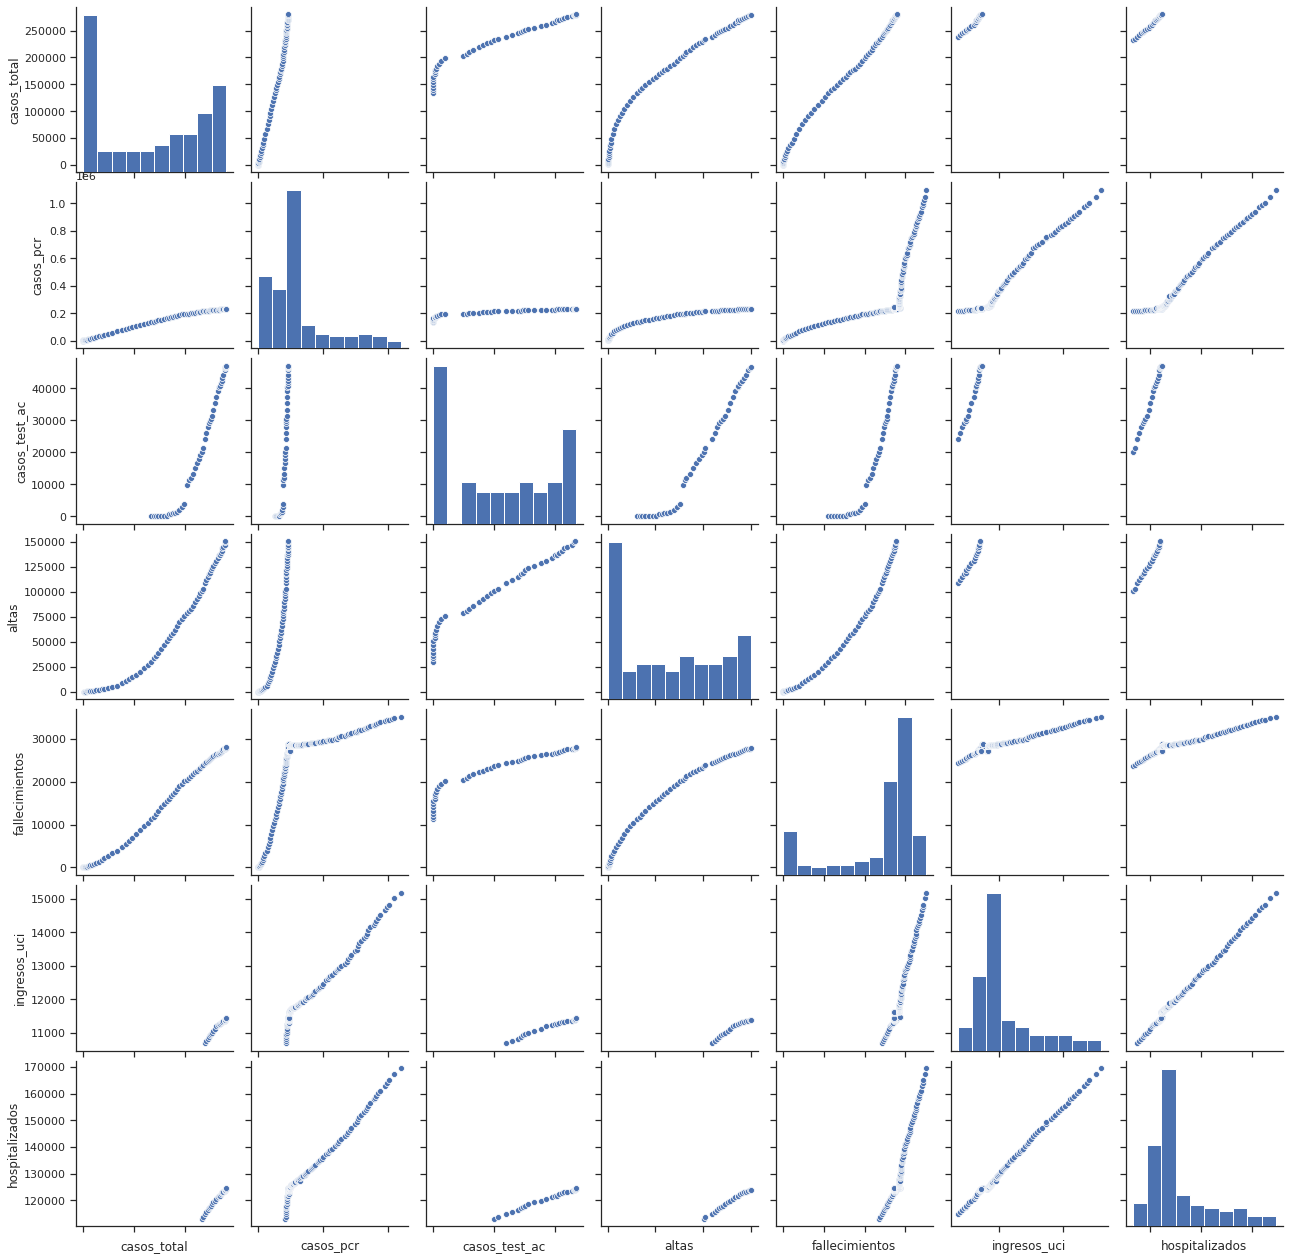

In [8]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_Covid19ESP)
g.set(xticklabels=[])

Something remarkable about the pairplot is the relationship between casos_pcr and fallecimientos. The deaths have stopped abruptly. This could be caused due to a [criteria change](https://www.elconfidencial.com/espana/2020-05-25/covid-19-datos-muertes-sanidad_2609991/)

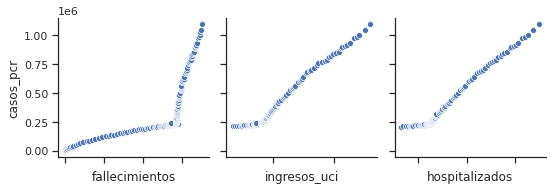

In [9]:
g2 = sns.pairplot(df_Covid19ESP,  x_vars = ['fallecimientos', 'ingresos_uci', 'hospitalizados'], y_vars=['casos_pcr'])
g2.set(xticklabels=[])

See all the data displayed. The columns that have the most actualized data are:
- **casos_pcr**: Number of cases due to pcr test.
- **hospitalizados**: Number of people hospitalized in ICU. 
- **ingresos_uci**: Number of people hospitalized.
- **fallecimientos**: Death amount. 

In [10]:
casos_pcr = df_Covid19ESP.loc[:, ['fecha','casos_pcr']]

fallecimientos = df_Covid19ESP.loc[:, ['fecha','fallecimientos']]
# Delete the null values of the dataframe
fallecimientos_nna = pd.notna(fallecimientos)
fallecimientos = fallecimientos[fallecimientos_nna.loc[:]['fallecimientos']]

ingresos_uci = df_Covid19ESP.loc[:, ['fecha','ingresos_uci']]
# Delete the null values of the dataframe
ingresos_uci_nna = pd.notna(ingresos_uci)
ingresos_uci = ingresos_uci[ingresos_uci_nna.loc[:]['ingresos_uci']]

hospitalizados = df_Covid19ESP.loc[:, ['fecha','hospitalizados']]
# Delete the null values of the dataframe
hospitalizados_nna = pd.notna(hospitalizados)
hospitalizados = hospitalizados[hospitalizados_nna.loc[:]['hospitalizados']]

print(df_Covid19ESP.to_string())

          fecha  casos_total  casos_pcr  casos_test_ac     altas  fallecimientos  ingresos_uci  hospitalizados
0    2020-02-21          3.0          3            NaN       NaN             NaN           NaN             NaN
1    2020-02-22          3.0          3            NaN       NaN             NaN           NaN             NaN
2    2020-02-23          3.0          3            NaN       NaN             NaN           NaN             NaN
3    2020-02-24          3.0          3            NaN       NaN             NaN           NaN             NaN
4    2020-02-25          4.0          4            NaN       NaN             NaN           NaN             NaN
5    2020-02-26         10.0         10            NaN       NaN             NaN           NaN             NaN
6    2020-02-27         18.0         18            NaN       NaN             NaN           NaN             NaN
7    2020-02-28         36.0         36            NaN       NaN             NaN           NaN             NaN
8

### Visualization of the results
**All data is represented in a subplot.**

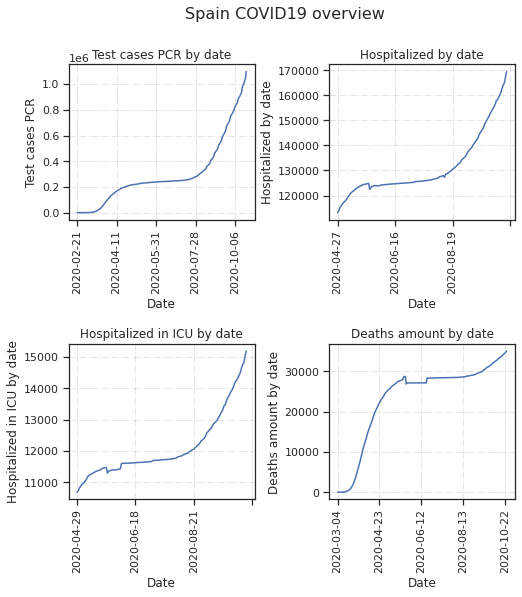

In [11]:
# General data of the charts.
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.8, wspace = 0.4)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Spain COVID19 overview', size = '16')

#Graph 1: Position 0.0
# casos_pcr
casos_pcr.plot(ax = ax[0,0] , kind='line',x='fecha',y='casos_pcr')
ax[0, 0].set_title('Test cases PCR by date')
ax[0, 0].legend().remove()
ax[0, 0].set_ylabel('Test cases PCR')
plt.sca(ax[0, 0])
plt.xticks(rotation = '90')
ax[0, 0].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[0, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 2: Position 0,1
# hospitalizados
hospitalizados.plot(ax = ax[0,1] , kind='line',x='fecha',y='hospitalizados')
ax[0, 1].set_title('Hospitalized by date')
ax[0, 1].legend().remove()
ax[0, 1].set_ylabel('Hospitalized by date')
plt.sca(ax[0, 1])
plt.xticks(rotation = '90')
ax[0, 1].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[0, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 3: Position 1,0
# hospitalizados EN UCI
ingresos_uci.plot(ax = ax[1,0] , kind='line',x='fecha',y='ingresos_uci')
ax[1, 0].set_title('Hospitalized in ICU by date')
ax[1, 0].legend().remove()
ax[1, 0].set_ylabel('Hospitalized in ICU by date')
plt.sca(ax[1, 0])
plt.xticks(rotation = '90')
ax[1, 0].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[1, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

#Graph 4: Position 1,1
# fallecimientos
fallecimientos.plot(ax = ax[1,1] , kind='line',x='fecha',y='fallecimientos')
ax[1, 1].set_title('Deaths amount by date')
ax[1, 1].legend().remove()
ax[1, 1].set_ylabel('Deaths amount by date')
plt.sca(ax[1, 1])
plt.xticks(rotation = '90')
ax[1, 1].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[1, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

plt.savefig('COVID19_Spain_overview.png')
plt.show()

To make the graphs more useful to represent the current state will be represented in the next graphs from the end of the alarm state on 21/06/2020.

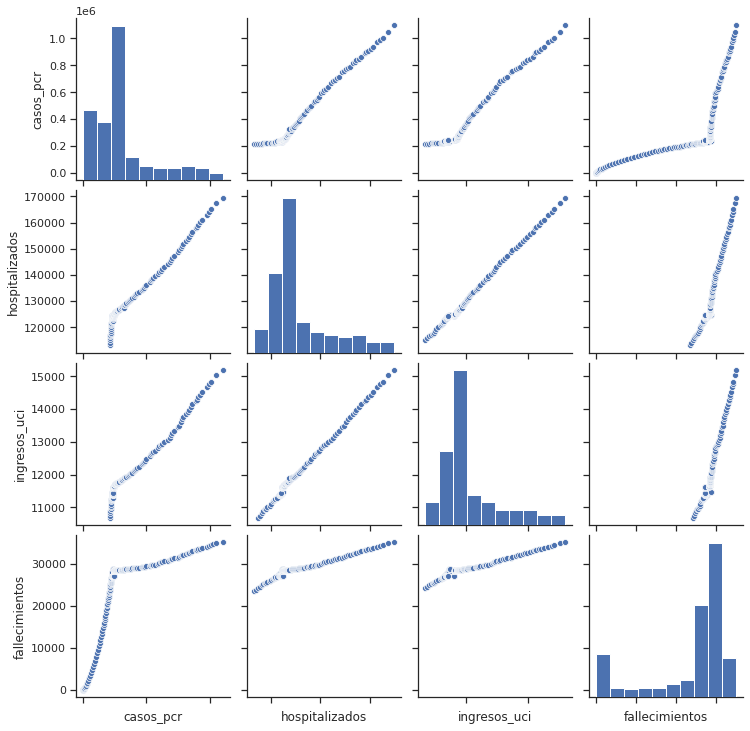

In [12]:
ingresos_uci_EAS = ingresos_uci[ingresos_uci.fecha >= '2020-06-21']
casos_pcr_EAS = casos_pcr[casos_pcr.fecha >= '2020-06-21']
fallecimientos_EAS = fallecimientos[fallecimientos.fecha >= '2020-06-21']
hospitalizados_EAS  =  hospitalizados[hospitalizados.fecha >= '2020-06-21']

EAS = pd.DataFrame(columns= ['fecha','casos_pcr','hospitalizados','ingresos_uci','fallecimientos'])
EAS['fecha']= casos_pcr['fecha']
EAS['casos_pcr']= casos_pcr['casos_pcr']
EAS['hospitalizados'] = hospitalizados['hospitalizados'] 
EAS['ingresos_uci'] = ingresos_uci['ingresos_uci']
EAS['fallecimientos'] = fallecimientos['fallecimientos']

sns.set(style="ticks", color_codes=True)
g3 = sns.pairplot(EAS)
g3.set(xticklabels=[])

Although one can see the currently very low correlation between pcr cases and deaths.

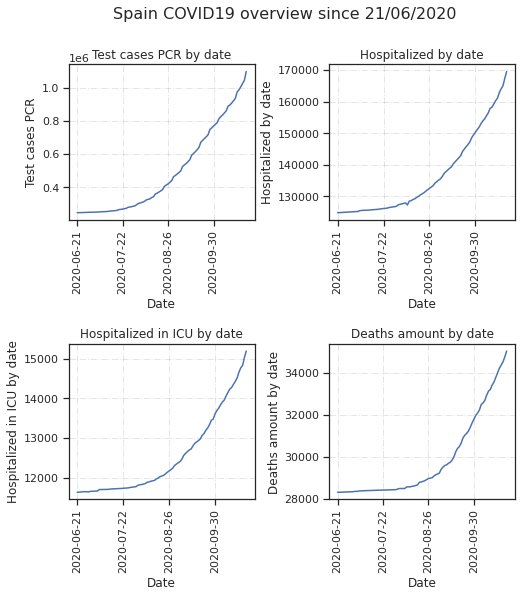

In [13]:
# General data of the charts.
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.8, wspace = 0.4)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Spain COVID19 overview since 21/06/2020', size = '16')

#Graph 1: Position 0.0
# casos_pcr
casos_pcr_EAS.plot(ax = ax[0,0] , kind='line',x='fecha',y='casos_pcr')
ax[0, 0].set_title('Test cases PCR by date')
ax[0, 0].legend().remove()
ax[0, 0].set_ylabel('Test cases PCR')
plt.sca(ax[0, 0])
plt.xticks(rotation = '90')
ax[0, 0].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[0, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 2: Position 0,1
# hospitalizados
hospitalizados_EAS.plot(ax = ax[0,1] , kind='line',x='fecha',y='hospitalizados')
ax[0, 1].set_title('Hospitalized by date')
ax[0, 1].legend().remove()
ax[0, 1].set_ylabel('Hospitalized by date')
plt.sca(ax[0, 1])
plt.xticks(rotation = '90')
ax[0, 1].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[0, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 3: Position 1,0
# hospitalizados EN UCI
ingresos_uci_EAS.plot(ax = ax[1,0] , kind='line',x='fecha',y='ingresos_uci')
ax[1, 0].set_title('Hospitalized in ICU by date')
ax[1, 0].legend().remove()
ax[1, 0].set_ylabel('Hospitalized in ICU by date')
plt.sca(ax[1, 0])
plt.xticks(rotation = '90')
ax[1, 0].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[1, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

#Graph 4: Position 1,1
# fallecimientos
fallecimientos_EAS.plot(ax = ax[1,1] , kind='line',x='fecha',y='fallecimientos')
ax[1, 1].set_title('Deaths amount by date')
ax[1, 1].legend().remove()
ax[1, 1].set_ylabel('Deaths amount by date')
plt.sca(ax[1, 1])
plt.xticks(rotation = '90')
ax[1, 1].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[1, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

plt.savefig('COVID19_Spain_since_2020_06_21.png')
plt.show()

These graphics can be visually deceptive. Because even though they look like it, the tilt of all the graphics is not the same. 

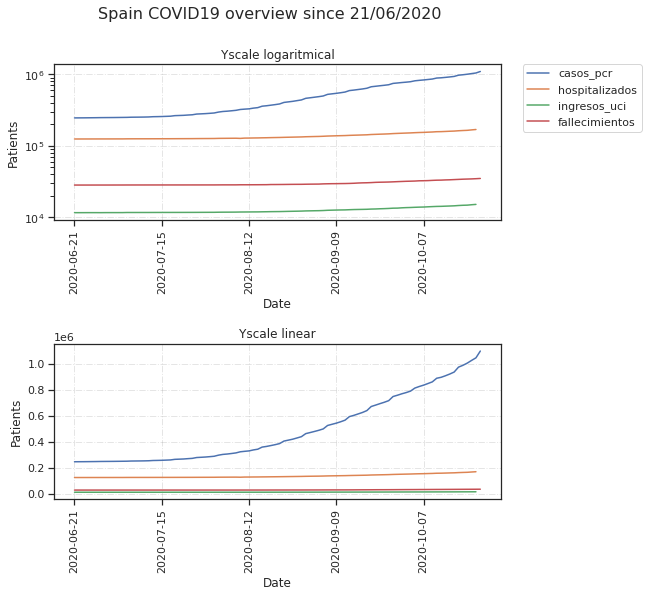

In [14]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(hspace = 0.8, wspace = 0.4)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Spain COVID19 overview since 21/06/2020', size = '16')

ax[0].set_title('Yscale logaritmical')
casos_pcr_EAS.plot(ax = ax[0], kind='line',x='fecha',y='casos_pcr')
hospitalizados_EAS.plot(ax = ax[0],kind='line',x='fecha',y='hospitalizados')
ingresos_uci_EAS.plot(ax = ax[0], kind='line',x='fecha',y='ingresos_uci')
fallecimientos_EAS.plot(ax = ax[0], kind='line',x='fecha',y='fallecimientos')
ax[0].set_ylabel('Patients')
ax[0].set_xlabel('Date')
plt.sca(ax[0])
plt.xticks(rotation = '90')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.yscale("log")

#Adding a grid in the plot for improve the visualization
ax[0].grid(True, linestyle='-.', which='major', axis = 'both' ,color='grey', alpha=.2)


ax[1].set_title('Yscale linear')
casos_pcr_EAS.plot(ax = ax[1], kind='line',x='fecha',y='casos_pcr')
hospitalizados_EAS.plot(ax = ax[1],kind='line',x='fecha',y='hospitalizados')
ingresos_uci_EAS.plot(ax = ax[1], kind='line',x='fecha',y='ingresos_uci')
fallecimientos_EAS.plot(ax = ax[1], kind='line',x='fecha',y='fallecimientos')
plt.sca(ax[1])
plt.xticks(rotation = '90')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax[1].legend().remove()
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Patients')

#Adding a grid in the plot for improve the visualization
ax[1].grid(True, linestyle='-.', which='major', axis = 'both' ,color='grey', alpha=.2)

plt.savefig('COVID19_Spain_linear_vs_log.png')
plt.show()

To appreciate the variation in the variables, the data will be computed by week.

In [15]:
EAS['fecha'] = pd.to_datetime(EAS['fecha'])
EAS['sem'] = EAS['fecha'].dt.strftime('%W')
## Change the NaN for 0
EAS = EAS.fillna(0)
## The difference from the previous day
EAS['casos_pcr_diff'] = EAS['casos_pcr']
EAS['hospitalizados_diff'] = EAS['casos_pcr']
EAS['ingresos_uci_diff'] = EAS['casos_pcr']
EAS['fallecimientos_diff'] = EAS['casos_pcr']

for i in range(EAS.shape[0] -1 ):
    j = i + 1
    EAS['casos_pcr_diff'].iloc[j] = EAS['casos_pcr'].iloc[j] - EAS['casos_pcr'].iloc[i]
    EAS['hospitalizados_diff'].iloc[j] = EAS['hospitalizados'].iloc[j] - EAS['hospitalizados'].iloc[i] 
    EAS['ingresos_uci_diff'].iloc[j] = EAS['ingresos_uci'].iloc[j] - EAS['ingresos_uci'].iloc[i]    
    EAS['fallecimientos_diff'].iloc[j] = EAS['fallecimientos'].iloc[j] - EAS['fallecimientos'].iloc[i] 

#Clean the outliers

EAS2 = EAS.drop(['sem','fecha','casos_pcr','hospitalizados','ingresos_uci','fallecimientos'], axis = 1)
EAS2.head()
z_scores = zscore(EAS2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
EAS2 = EAS2[filtered_entries]
EAS2['fecha'] = EAS['fecha']


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


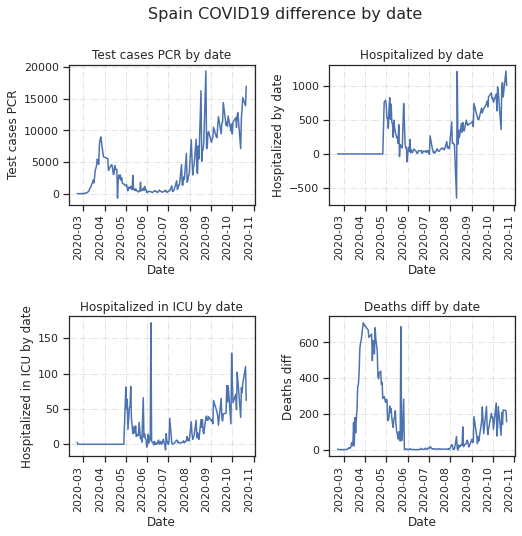

In [16]:
# General data of the charts.
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.8, wspace = 0.4)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Spain COVID19 difference by date', size = '16')

#Graph 1: Position 0.0
# casos_pcr
EAS2.plot(ax = ax[0,0] , kind='line',x='fecha',y='casos_pcr_diff')
ax[0, 0].set_title('Test cases PCR by date')
ax[0, 0].legend().remove()
ax[0, 0].set_ylabel('Test cases PCR')
plt.sca(ax[0, 0])
plt.xticks(rotation = '90')
ax[0, 0].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[0, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 2: Position 0,1
# hospitalizados
EAS2.plot(ax = ax[0,1] , kind='line',x='fecha',y='hospitalizados_diff')
ax[0, 1].set_title('Hospitalized by date')
ax[0, 1].legend().remove()
ax[0, 1].set_ylabel('Hospitalized by date')
plt.sca(ax[0, 1])
plt.xticks(rotation = '90')
ax[0, 1].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[0, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 3: Position 1,0
# hospitalizados EN UCI
EAS2.plot(ax = ax[1,0] , kind='line',x='fecha',y='ingresos_uci_diff')
ax[1, 0].set_title('Hospitalized in ICU by date')
ax[1, 0].legend().remove()
ax[1, 0].set_ylabel('Hospitalized in ICU by date')
plt.sca(ax[1, 0])
plt.xticks(rotation = '90')
ax[1, 0].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[1, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

#Graph 4: Position 1,1
# fallecimientos
EAS2.plot(ax = ax[1,1] , kind='line',x='fecha',y='fallecimientos_diff')
ax[1, 1].set_title('Deaths diff by date')
ax[1, 1].legend().remove()
ax[1, 1].set_ylabel('Deaths diff')
plt.sca(ax[1, 1])
plt.xticks(rotation = '90')
ax[1, 1].set_xlabel('Date')

#Adding a grid in the plot for improve the visualization
ax[1, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

plt.savefig('COVID19_Spain_diff_date.png')
plt.show()

It is grouped by week and the increments per week are observed.

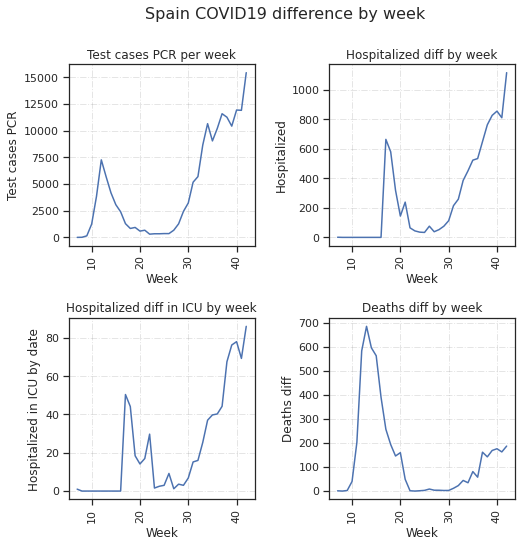

In [17]:
EAS2['sem'] = EAS2['fecha'].dt.strftime('%W')
EAS2['semana']= EAS2['sem'].astype(int)
EAS_sem = EAS2.groupby('sem').mean()
#EAS_sem = EAS_sem.drop(['casos_pcr','hospitalizados','ingresos_uci','fallecimientos'], axis = 1)
# General data of the charts.
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle('Spain COVID19 difference by week', size = '16')

#Graph 1: Position 0.0
# casos_pcr
EAS_sem.plot(ax = ax[0,0] , kind='line',x='semana',y='casos_pcr_diff')
ax[0, 0].set_title('Test cases PCR per week')
ax[0, 0].legend().remove()
ax[0, 0].set_ylabel('Test cases PCR')
plt.sca(ax[0, 0])
plt.xticks(rotation = '90')
ax[0, 0].set_xlabel('Week')

#Adding a grid in the plot for improve the visualization
ax[0, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 2: Position 0,1
# hospitalizados
EAS_sem.plot(ax = ax[0,1] , kind='line',x='semana',y='hospitalizados_diff')
ax[0, 1].set_title('Hospitalized diff by week')
ax[0, 1].legend().remove()
ax[0, 1].set_ylabel('Hospitalized')
plt.sca(ax[0, 1])
plt.xticks(rotation = '90')
ax[0, 1].set_xlabel('Week')

#Adding a grid in the plot for improve the visualization
ax[0, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[0, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)


#Graph 3: Position 1,0
# hospitalizados EN UCI
EAS_sem.plot(ax = ax[1,0] , kind='line',x='semana',y='ingresos_uci_diff')
ax[1, 0].set_title('Hospitalized diff in ICU by week')
ax[1, 0].legend().remove()
ax[1, 0].set_ylabel('Hospitalized in ICU by date')
plt.sca(ax[1, 0])
plt.xticks(rotation = '90')
ax[1, 0].set_xlabel('Week')

#Adding a grid in the plot for improve the visualization
ax[1, 0].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 0].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

#Graph 4: Position 1,1
# fallecimientos
EAS_sem.plot(ax = ax[1,1] , kind='line',x='semana',y='fallecimientos_diff')
ax[1, 1].set_title('Deaths diff by week')
ax[1, 1].legend().remove()
ax[1, 1].set_ylabel('Deaths diff')
plt.sca(ax[1, 1])
plt.xticks(rotation = '90')
ax[1, 1].set_xlabel('Week')

#Adding a grid in the plot for improve the visualization
ax[1, 1].xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
ax[1, 1].yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)

plt.savefig('COVID19_Spain_diff_week.png')
plt.show()

# Conclusion (26-08-2020)

First, **What is a second wave?**

According to a [BBC article](https://www.bbc.com/news/health-53113785): *Some describe any rise as a second wave, but it is often a bumpy first wave. This is happening in some US states.
In order to say one wave has ended, the virus would have been brought under control and cases fallen substantially.
For a second wave to start you would need a sustained rise in infections.*

With this definition we could conclude that yes, without a doubt. From the first weeks of July, after the end of the state of alarm, on 21/06/2020, the rise in cases began. 

Should new infections be prevented? Of course, any security measure is insufficient. 

The data is getting worse and worse, and the number of infected people is increasing. We must also take into account the increase in the number of asymptomatic people, which can be seen because the number of hospitalizations and PCR cases has not increased to the same degree.

![COVID19_Spain_diff_date](./COVID19_Spain_diff_date.png)

![COVID19_Spain_diff_week](./COVID19_Spain_diff_week.png)